### Please note that the code below is for the AD-Covid Gene Regulatory Section of: "Integrative analysis of multi-omics reveals gene regulatory networks across brain regions from risk variants to phenotypes of Alzheimer's disease and Covid-19"
### By: Saniya Khullar and Daifeng Wang, Ph.D.

In [1]:

region = "LTL"
filePathFull_LTL = "F://organizedAlzheimers//ADSNPheno//outputFiles//outputsLTL//finalGeneRegulatoryNetwork//finalFullGeneRegulatoryNetwork_GenieRTNTrenaTrrust2_Scgrnom_TFtoGenes_ALLChromosomes_Alzheimers_LTL_GeneExpress_2_minSources.csv"

In [2]:
print(":) Please note we are reading in this function: organizingOutputFileForTFToGeneRelationship(grnResultsCombinedFileNameCSV, parentName, disease, bodyRegion, dataScalingOutputMini, geneToEntrezIDMappingPath, minNumSourcesGeneGRN, progressBarPythonIterations)")
#def organizingOutputFileForTFToGeneRelationship(fileName, parentName, disease, bodyRegion, dataScaling, powerVal, newDate):


import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from numpy import mean
from numpy import std
# Classification and ROC analysis
from itertools import cycle
from sklearn.feature_selection import RFE
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

:) Please note we are reading in this function: organizingOutputFileForTFToGeneRelationship(grnResultsCombinedFileNameCSV, parentName, disease, bodyRegion, dataScalingOutputMini, geneToEntrezIDMappingPath, minNumSourcesGeneGRN, progressBarPythonIterations)


In [3]:

minNumSourcesGeneGRN = 2
adsnphenoDirectory = "F://organizedAlzheimers//ADSNPheno//"  # please supply full directory path
codeFolder = adsnphenoDirectory + "code//" # the main folder where code would be within ADSNPheno
dataFolder = adsnphenoDirectory + "data//"  # the main folder where data would be within ADSNPheno

dfFilePath = dataFolder + "covidDataSets//covidPredictionForADSNPheno.csv"
cogdxDFFilePath = dataFolder + "covidDataSets//covidADPhenos.csv"
covidOutputFilePath = dataFolder + "covidDataSets//regionsGeneTF_CovidADRelated_AtLeast2Sources_FullGRN.csv"

outputPartPath = "F://" # please note that this is the main folder where the outputs will be stored :)



seedVal = 123 # please note for reproducibility, we use this pseudo-random number of 123
np.random.seed(seedVal)
cvNum = 4 # please note that we do 4-fold cross validation here

## Please note that we are Running Key Results:

In [4]:
df = pd.read_csv(dfFilePath) 
df

,geneName,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,NC17,NC18,NC19,NC20,NC21,NC22,NC23,NC24,NC25,NC26
0,A1BG,0.49,0.29,0.26,0.45,0.17,0.21,0.49,0.12,0.51,...,0.37,0.33,0.25,0.20,0.40,0.30,0.70,0.75,2.80,0.22
1,A1CF,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,A2M,0.21,0.14,0.03,0.09,0.00,0.08,0.23,0.08,0.88,...,0.07,0.06,0.11,0.01,0.04,0.02,0.02,0.27,0.04,0.28
3,A2ML1,0.04,0.00,0.02,0.07,0.05,0.04,0.03,0.01,0.02,...,0.01,0.00,0.00,0.02,0.02,0.02,0.01,0.00,0.00,0.00
4,A3GALT2,0.07,0.00,0.00,0.00,0.07,0.00,0.07,0.00,0.79,...,0.18,0.00,0.04,0.00,0.00,0.00,0.00,0.06,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19467,ZYG11A,0.06,0.14,0.28,0.27,0.07,0.20,0.19,0.03,0.33,...,0.10,0.06,0.06,0.10,0.06,0.24,0.12,0.14,0.33,0.10
19468,ZYG11B,8.17,8.20,3.62,7.88,5.96,7.14,7.94,7.11,7.93,...,8.82,2.65,2.93,4.58,2.82,1.58,1.57,5.05,1.07,1.25
19469,ZYX,363.01,399.80,430.35,209.25,272.91,246.58,186.24,328.67,366.72,...,475.35,573.54,706.85,712.03,492.63,447.14,748.55,437.62,369.66,577.13
19470,ZZEF1,19.17,15.72,13.95,14.78,8.69,10.58,17.59,10.42,14.67,...,13.38,5.01,4.60,9.06,4.07,3.04,4.55,10.34,1.83,2.08


In [5]:
cogdxDF = pd.read_csv(cogdxDFFilePath)
cogdxDF

,Patient,Name,Infected?,Severity,Overall,Num,Age,Gender,sampleInfo
0,C1,COVID_01_39y_male_NonICU,COVID,NonICU,COVID_NonICU,1,39y,male,GSM4753021
1,C2,COVID_02_63y_male_NonICU,COVID,NonICU,COVID_NonICU,2,63y,male,GSM4753022
2,C3,COVID_03_33y_male_NonICU,COVID,NonICU,COVID_NonICU,3,33y,male,GSM4753023
3,C4,COVID_04_49y_male_NonICU,COVID,NonICU,COVID_NonICU,4,49y,male,GSM4753024
4,C5,COVID_05_49y_male_NonICU,COVID,NonICU,COVID_NonICU,5,49y,male,GSM4753025
...,...,...,...,...,...,...,...,...,...
121,NC22,NONCOVID_22_63y_male_NonICU,NONCOVID,NonICU,NONCOVID_NonICU,22,63y,male,GSM4753142
122,NC23,NONCOVID_23_42y_female_NonICU,NONCOVID,NonICU,NONCOVID_NonICU,23,42y,female,GSM4753143
123,NC24,NONCOVID_24_32y_female_NonICU,NONCOVID,NonICU,NONCOVID_NonICU,24,32y,female,GSM4753144
124,NC25,NONCOVID_25_62y_male_NonICU,NONCOVID,NonICU,NONCOVID_NonICU,25,62y,male,GSM4753145


## Published Covid-19 Genes Result:

In [6]:
region = "published"

minNumSourcesGeneGRN

if type(minNumSourcesGeneGRN) == "int":
    addOnPart = region + "_" + str(cvNum) + "Fold_" + str(minNumSourcesGeneGRN) + "minSsources.csv"
else:
    addOnPart = region + "_" + str(cvNum) + "Fold.csv"
    
addOnPart

'published_4Fold.csv'

In [7]:
if region == "published":
    covidGenes = ['DNAH7', 'CLUAP1', 'DES', 'SPEG', 'STXBP5', 'PCDH15', 'TOMM7', 'WSB1', 'ACE2', 'TMPRSS2',  'OAS1', 'OAS2', 'OAS3', 'TYK2', 'DPP9', 'IFNAR2', 'CCR2'] 
else:
    covidGenes = pd.read_csv(covidOutputFilePath)
    covidGenes = list(set(covidGenes["gene/TF"].tolist()))
covidGenes

['DNAH7',
 'CLUAP1',
 'DES',
 'SPEG',
 'STXBP5',
 'PCDH15',
 'TOMM7',
 'WSB1',
 'ACE2',
 'TMPRSS2',
 'OAS1',
 'OAS2',
 'OAS3',
 'TYK2',
 'DPP9',
 'IFNAR2',
 'CCR2']

In [8]:
miniDF = df[df['geneName'].isin(covidGenes)].drop_duplicates()
miniDF = miniDF.drop(cogdxDF[cogdxDF["Overall"] == "NONCOVID_NonICU"]["Patient"].tolist(), axis = 1)
miniDF = miniDF.drop(cogdxDF[cogdxDF["Overall"] == "NONCOVID_ICU"]["Patient"].tolist(), axis = 1)
miniDF
geneNames = miniDF["geneName"].tolist()

patientList = cogdxDF["Patient"].tolist()
cogdxList = cogdxDF["Overall"].tolist()
patientList

patientToCogdxDict = {}  # patient:cogdx

for i in range(0, len(patientList)):
    patient = patientList[i]
    cogdx = cogdxList[i]
    patientToCogdxDict[patient] = cogdx

    
cogDXValuesList = [] # the mapped values for cogdx
cogDXValues_TrainList = [] # the mapped values for cogdx Training
cogDXValues_TestList = [] # the mapped values for cogdx Testing

for col in miniDF.columns.tolist()[1:]:
    cogDXValuesList.append(patientToCogdxDict[col])   
cogDXgroups = cogDXValuesList


trainY = pd.DataFrame(cogDXgroups)
trainY

y = trainY
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
encoded_Y = 1-encoded_Y
encoded_Y
y = encoded_Y
y
print("y:", y)


x = miniDF.transpose()
x.columns = x.iloc[0]
x = x.drop(x.index[0])
x

x = x.values

# Recursive Feature Elimination:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
min_features_to_select = 1  

# Create the RFE object and compute a cross-validated score.

svc = SVC(kernel="linear", class_weight = 'balanced', random_state = seedVal)


rfecv_red = RFECV(estimator=svc, step=1, cv=cvNum,
              scoring='accuracy',
              min_features_to_select=min_features_to_select, n_jobs = 7)
rfecv_red.fit(x, y)

numToSelect = rfecv_red.n_features_
print(numToSelect)
xAxisVals = range(min_features_to_select,
               len(rfecv_red.grid_scores_) + min_features_to_select)

yAxisVals = rfecv_red.grid_scores_
rfe_redCVDF = pd.DataFrame(xAxisVals, columns = ["numFeatures"])
rfe_redCVDF["crossValidationScore"] = yAxisVals
print(rfe_redCVDF)



svc = SVC(kernel="linear", class_weight = 'balanced')
rfe = RFE(svc,  n_features_to_select = numToSelect)
rfe = rfe.fit(x, y)


geneListSelected = miniDF#[miniDF["geneName"].isin(aboveThresholdGenes)]#["geneName"]
geneListSelected = geneListSelected[rfe.support_ == True]["geneName"].tolist()
geneListSelected

miniList = miniDF[miniDF["geneName"].isin(geneListSelected)]#["geneName"]
miniList = miniList.drop(["geneName"], axis = 1)
miniList

C:\Users\saniy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y: [0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0]
15
    numFeatures  crossValidationScore
0             1                  0.74
1             2                  0.72
2             3                  0.72
3             4                  0.71
4             5                  0.73
5             6                  0.76
6             7                  0.74
7             8                  0.77
8             9                  0.76
9            10                  0.78
10           11                  0.82
11           12                  0.81
12           13                  0.84
13           14                  0.84
14           15                  0.85
15           16                  0.84
16           17                  0.84


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103
145,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.03,0.00,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00
2558,219.37,104.73,52.33,69.64,106.48,54.20,147.01,58.92,197.78,36.14,...,27.71,127.67,28.29,14.26,31.17,17.72,49.95,33.31,16.39,28.11
3297,2.14,1.42,1.53,3.87,1.00,3.35,4.70,0.78,1.06,0.61,...,3.58,2.28,2.45,0.86,0.83,0.54,1.74,3.81,0.72,0.60
4274,0.17,0.33,0.18,0.43,0.00,0.07,0.49,0.11,0.10,0.12,...,0.47,0.09,0.55,0.00,0.34,0.33,1.59,0.45,0.00,0.03
4446,0.02,0.07,0.04,0.06,0.07,0.03,0.01,0.05,0.01,0.04,...,0.02,0.02,0.03,0.02,0.01,0.01,0.01,0.00,0.01,0.01
4578,13.15,10.03,7.99,11.29,5.95,7.80,12.91,4.62,11.19,7.43,...,8.69,10.15,3.15,4.17,6.08,2.84,4.12,6.60,6.44,3.71
7540,43.12,45.90,50.87,44.57,67.10,39.10,58.72,36.82,46.32,23.45,...,17.91,48.94,16.44,23.70,13.13,23.30,28.31,34.25,48.34,20.05
11165,1083.05,228.53,892.35,221.47,302.25,75.96,135.62,53.43,155.40,223.57,...,325.51,135.07,24.67,216.00,43.88,31.67,405.48,58.21,646.92,744.37
11166,650.13,56.31,449.44,65.72,121.18,40.28,85.47,16.22,58.65,66.40,...,123.88,41.84,13.75,51.22,10.99,10.42,132.59,28.70,431.45,210.86
11167,376.88,26.72,302.89,32.06,68.24,18.48,37.18,9.72,22.33,44.55,...,42.54,16.56,1.51,25.40,2.47,2.61,45.21,5.38,286.97,113.08


PUBLISHED
Optimal number of features : 15


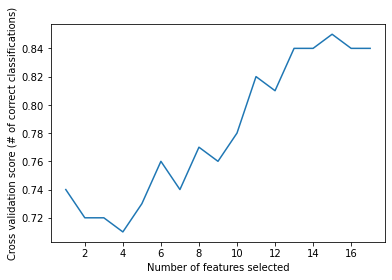

[[0.92941575 0.07058425]
 [0.668356   0.331644  ]
 [0.91002405 0.08997595]
 [0.8212868  0.1787132 ]
 [0.62951842 0.37048158]
 [0.71142831 0.28857169]
 [0.8946093  0.1053907 ]
 [0.18246963 0.81753037]
 [0.35440574 0.64559426]
 [0.35436615 0.64563385]
 [0.86006063 0.13993937]
 [0.18919631 0.81080369]
 [0.72742728 0.27257272]
 [0.11744917 0.88255083]
 [0.08413423 0.91586577]
 [0.75358746 0.24641254]
 [0.8277845  0.1722155 ]
 [0.66171568 0.33828432]
 [0.66022916 0.33977084]
 [0.36409778 0.63590222]
 [0.04714261 0.95285739]
 [0.05285282 0.94714718]
 [0.27455464 0.72544536]
 [0.1377845  0.8622155 ]
 [0.74921923 0.25078077]
 [0.20810606 0.79189394]
 [0.3926796  0.6073204 ]
 [0.10217348 0.89782652]
 [0.25937318 0.74062682]
 [0.36429274 0.63570726]
 [0.33508328 0.66491672]
 [0.21126695 0.78873305]
 [0.79251262 0.20748738]
 [0.42325936 0.57674064]
 [0.58625262 0.41374738]
 [0.54294498 0.45705502]
 [0.68928988 0.31071012]
 [0.29714678 0.70285322]
 [0.2907349  0.7092651 ]
 [0.12325579 0.87674421]


In [9]:
# plotting
print(region.upper())
print("Optimal number of features : %d" % rfecv_red.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_red.grid_scores_) + min_features_to_select),
         rfecv_red.grid_scores_)
plt.show()


random_state = seedVal
modelSVC = SVC(kernel="linear", class_weight = 'balanced', random_state = seedVal, probability = True)
#modelSVC = SVC(kernel="linear", class_weight = 'balanced', random_state = seedVal, probability = True)

modelSVC.fit(miniList.transpose(), y)
#model = LogisticRegression(solver='liblinear', random_state=random_state).fit(miniList.transpose(), y)
modelSVC.predict_proba(miniList.transpose())
print(modelSVC.predict_proba(miniList.transpose()))

scores = cross_val_score(modelSVC, miniList.transpose(), y, cv=cvNum) #metrics.accuracy_score(y_Test, y_pred)
accuracyLOOCV = mean(scores)
sdLOOCV = std(scores)
cv = cvNum

print("accuracy ", cv, " CV:", accuracyLOOCV)
print("standard deviation ", cv, " CV:", sdLOOCV)

numToSelect = rfecv_red.n_features_
numToSelect
xAxisVals = range(min_features_to_select,
               len(rfecv_red.grid_scores_) + min_features_to_select)

yAxisVals = rfecv_red.grid_scores_
rfe_redCVDF = pd.DataFrame(xAxisVals, columns = ["numFeatures"])
rfe_redCVDF["crossValidationScore"] = yAxisVals
rfe_redCVDF
outputPart = outputPartPath + "rfe_redCVDF_Covid_SVC_" + addOnPart
print(":) Please note rfe redCV is here: ", outputPart)
rfe_redCVDF.to_csv(outputPart)#"F://all3RegionsCovid_4fold_june2021_atLeast2sources.csv")
rfe_redCVDF

geneListSelected = miniDF#[miniDF["geneName"].isin(aboveThresholdGenes)]#["geneName"]
geneListSelected = geneListSelected[rfe.support_ == True]["geneName"].tolist()
print(":) geneListSelected: ", geneListSelected)

C:\Users\saniy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


mean_tpr_ published : [0.0, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.7275641025641025, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.8814102564102564, 0.8814102564102564, 0.8814102564102564, 0.8814102564102564, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0

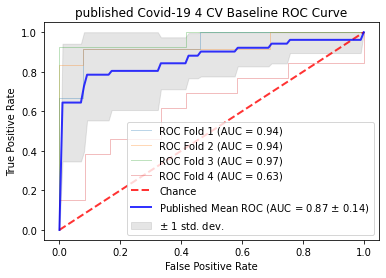

In [10]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
# geneListSelected = miniDF["geneName"][rfe.support_ == True].tolist()

random_state = seedVal

X = miniList.transpose().values
X.shape
classifier = modelSVC
# #############################################################################

# Run classifier with cross-validation and plot ROC curves

splits = cvNum
kf = StratifiedKFold(n_splits=splits, random_state=random_state) #

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(kf.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC Fold {}'.format(i+1),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)

mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

print("mean_tpr_", region, ":", list(mean_tpr))
print("mean_fpr_", region, ":", list(mean_fpr))
print("mean_auc_", region, ":",  mean_auc)
print("std_auc_", region, ":",  std_auc)



ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Published Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
print(std_tpr)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

pltTitle = region + " Covid-19 " + str(splits) + " CV Baseline ROC Curve"
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title=pltTitle)
ax.legend(loc="lower right")
plt.show()

In [11]:
predictionsMade = [] # actual, class 0 pred, class 1 pred
probas1_ = modelSVC.predict_proba(miniList.transpose())
for i in range(0, len(y)):
    point = probas1_[i]
    yVal = y[i]
    #print(point[0])
    predictionsMade.append([yVal, point[0], point[1], region])
predictionsMade

predDF = pd.DataFrame(predictionsMade, columns = ["actual", "covidNonICU(0)", "CovidICU(1)", "Region"])
predDF
outputPart = outputPartPath + "updatedPredDF_Covid_SVC_" + addOnPart
print(outputPart)
predDF.to_csv(outputPart)
print(":) Please note that this predicted probabilities result dataframe below is used to then perform Decision Curve Analysis to see the clinical benefits from using the Published Genes Model:")
predDF

F://updatedPredDF_Covid_SVC_published_4Fold.csv
:) Please note that this predicted probabilities result dataframe below is used to then perform Decision Curve Analysis to see the clinical benefits from using the Published Genes Model:


,actual,covidNonICU(0),CovidICU(1),Region
0,0,0.943696,0.056304,published
1,0,0.682530,0.317470,published
2,0,0.951198,0.048802,published
3,0,0.816752,0.183248,published
4,0,0.614505,0.385495,published
...,...,...,...,...
95,1,0.454378,0.545622,published
96,0,0.595466,0.404534,published
97,1,0.813715,0.186285,published
98,0,0.592909,0.407091,published


In [12]:
fpr = mean_fpr
tpr = mean_tpr
roc_auc = mean_auc

print(region," ", cvNum, " fold")
print("# genes: ", miniList.shape[0])
print("accuracy_", cvNum, "_fold_SVC", accuracyLOOCV)
print("sd_", cvNum, "_fold_SVC", sdLOOCV)
print("fpr")
print(list(fpr))#

print("tpr")
print(list(tpr))    
print("roc_auc")
print(roc_auc)

published   4  fold
# genes:  15
accuracy_ 4 _fold_SVC 0.8
sd_ 4 _fold_SVC 0.14696938456699069
fpr
[0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.434343434343434

In [13]:
numGenesToFix = numToSelect
print(":) Please note that based on results for ", region, " we will fix the # of genes for the AD-Covid GRN models to:", numGenesToFix)

:) Please note that based on results for  published  we will fix the # of genes for the AD-Covid GRN models to: 15


## Lateral Temporal Lobe:

In [14]:
comboFullDF_atLeast2 = pd.read_csv(filePathFull_LTL)
if "Unnamed: 0" in comboFullDF_atLeast2.columns.tolist():
    comboFullDF_atLeast2 = comboFullDF_atLeast2.drop(["Unnamed: 0"], axis = 1)
comboFullDF_atLeast2 = comboFullDF_atLeast2.drop_duplicates()
comboFullDF_atLeast2
    

,currentTF,regulatedGene,info,sources,numSources,region,TFEntrezId,targetGeneEntrezId,CombinedEntrezName,chromosome,start,end,regulatoryRegion,tfAndChrom,new_start,new_end
0,GLIS2,ACAP3,GENIE3 (Rank: 268746; Weight: 0.0079) || TReNA...,Genie3 || TReNa,2,LTL,84662,116983,84662 || 116983,chr1,25757446,25762445,promoter,chr1_84662,25755446,25764445
1,GLIS2,MIB2,GENIE3 (Rank: 1008189; Weight: 0.004) || TReNA...,Genie3 || TReNa,2,LTL,84662,142678,84662 || 142678,chr1,25757446,25762445,promoter,chr1_84662,25755446,25764445
2,SRF,MIB2,GENIE3 (Rank: 1724863; Weight: 0.0028) || TReN...,Genie3 || TReNa,2,LTL,6722,142678,6722 || 142678,chr1,1542010,1567873,enhancer,chr1_6722,1532010,1577873
3,CTCF,RRAGC,GENIE3 (Rank: 1062498; Weight: 0.0039) || TReN...,Genie3 || TReNa,2,LTL,10664,64121,10664 || 64121,chr1,231155671,231160670,promoter,chr1_10664,231153671,231162670
4,CTCF,RRAGC,GENIE3 (Rank: 1062498; Weight: 0.0039) || TReN...,Genie3 || TReNa,2,LTL,10664,64121,10664 || 64121,chr1,100155065,100160064,promoter,chr1_10664,100153065,100162064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161399,IRF4,ZNF157,GENIE3 (Rank: 408981; Weight: 0.0065) || TReNA...,Genie3 || TReNa,2,LTL,3662,7712,3662 || 7712,chrX,72853144,72858143,promoter,chrX_3662,72851144,72860143
161400,RXRG,ZNF157,GENIE3 (Rank: 814536; Weight: 0.0045) || TReNA...,Genie3 || TReNa,2,LTL,6258,7712,6258 || 7712,chrX,72853144,72858143,promoter,chrX_6258,72851144,72860143
161401,RXRG,ZNF157,GENIE3 (Rank: 814536; Weight: 0.0045) || TReNA...,Genie3 || TReNa,2,LTL,6258,7712,6258 || 7712,chrX,47180541,47181885,enhancer,chrX_6258,47170541,47191885
161402,RXRG,ZNF157,GENIE3 (Rank: 814536; Weight: 0.0045) || TReNA...,Genie3 || TReNa,2,LTL,6258,7712,6258 || 7712,chrX,47219573,47223832,enhancer,chrX_6258,47209573,47233832


In [15]:
region = "LTL"
if type(minNumSourcesGeneGRN) == "int":
    addOnPart = region + "_" + str(cvNum) + "Fold_" + str(minNumSourcesGeneGRN) + "minSsources.csv"
else:
    addOnPart = region + "_" + str(cvNum) + "Fold.csv"
    
addOnPart

df = pd.read_csv(dfFilePath) 
cogdxDF = pd.read_csv(cogdxDFFilePath)
cogdxDF

if region == "published":
    covidGenes = ['DNAH7', 'CLUAP1', 'DES', 'SPEG', 'STXBP5', 'PCDH15', 'TOMM7', 'WSB1', 'ACE2', 'TMPRSS2',  'OAS1', 'OAS2', 'OAS3', 'TYK2', 'DPP9', 'IFNAR2', 'CCR2'] 
else:
    covidGenes = pd.read_csv(covidOutputFilePath)
    if region != "ALL":
        covidGenes = covidGenes[covidGenes["region"] == region]
covidGenes = list(set(covidGenes["gene/TF"].tolist()))
covidGenes

['PAFAH2',
 'C8orf88',
 'SHROOM1',
 'FNDC10',
 'BAZ1A',
 'RDH12',
 'SNORA26',
 'NEFM',
 'MAPK1',
 'MIR3194',
 'MAPK8',
 'LINC00943',
 'FAN1',
 'SPEF2',
 'LINC01762',
 'SNORD17',
 'ASS1',
 'DPP6',
 'DOK1',
 'ENPP1',
 'ONECUT2',
 'ANXA2P3',
 'LOC284898',
 'TTLL1',
 'MAN2B1',
 'MEF2A',
 'LOC440446',
 'HNF1A',
 'REPS1',
 'C7orf61',
 'CRAT',
 'RTTN',
 'LYAR',
 'APLN',
 'FOXP1',
 'PKD2L2',
 'PTPN3',
 'PRKAA2',
 'FKBP5',
 'STEAP3',
 'SATB2',
 'IL3',
 'TMEM268',
 'MTSS1',
 'ABCC12',
 'C21orf59',
 'PIK3CD',
 'GNRH1',
 'RBM38',
 'SPI1',
 'INTU',
 'DDX31',
 'DGUOK',
 'CHRNB1',
 'SLC6A17',
 'SCG3',
 'PNMA3',
 'BFSP1',
 'TP53',
 'IL36G',
 'ETV5',
 'LINC00399',
 'MRPS18A',
 'GPI',
 'LINC01333',
 'TTC38',
 'DCTD',
 'GPM6A',
 'CSMD3',
 'CDH4',
 'TECRL',
 'PYGL',
 'MIR6755',
 'CLEC2L',
 'RGCC',
 'LOC101927464',
 'ZNF592',
 'GPC5',
 'MAPK9',
 'CYB5B',
 'PBX3',
 'UNC13C',
 'HCG22',
 'PIK3R5',
 'SMAD3',
 'CMTM7',
 'CIDECP',
 'SYNM',
 'LINC00884',
 'CNTNAP5',
 'REG1B',
 'PIGZ',
 'STAT2',
 'MAS1',
 'DNM3OS'

In [16]:
miniDF = df[df['geneName'].isin(covidGenes)].drop_duplicates()
miniDF = miniDF.drop(cogdxDF[cogdxDF["Overall"] == "NONCOVID_NonICU"]["Patient"].tolist(), axis = 1)
miniDF = miniDF.drop(cogdxDF[cogdxDF["Overall"] == "NONCOVID_ICU"]["Patient"].tolist(), axis = 1)
miniDF
geneNames = miniDF["geneName"].tolist()

patientList = cogdxDF["Patient"].tolist()
cogdxList = cogdxDF["Overall"].tolist()
patientList

patientToCogdxDict = {}  # patient:cogdx

for i in range(0, len(patientList)):
    patient = patientList[i]
    cogdx = cogdxList[i]
    patientToCogdxDict[patient] = cogdx

    
cogDXValuesList = [] # the mapped values for cogdx
cogDXValues_TrainList = [] # the mapped values for cogdx Training
cogDXValues_TestList = [] # the mapped values for cogdx Testing

for col in miniDF.columns.tolist()[1:]:
    cogDXValuesList.append(patientToCogdxDict[col])   
cogDXgroups = cogDXValuesList


trainY = pd.DataFrame(cogDXgroups)
trainY

y = trainY
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
encoded_Y = 1-encoded_Y
encoded_Y
y = encoded_Y
y
print("y:", y)


x = miniDF.transpose()
x.columns = x.iloc[0]
x = x.drop(x.index[0])
x

x = x.values

#  Recursive Feature Elimination:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
min_features_to_select = 1  

# Create the RFE object and compute a cross-validated score.

svc = SVC(kernel="linear", class_weight = 'balanced', random_state = seedVal)

rfecv_red = RFECV(estimator=svc, step=1, cv=cvNum,
              scoring='accuracy',
              min_features_to_select=min_features_to_select, n_jobs = 7)
rfecv_red.fit(x, y)

numToSelect = rfecv_red.n_features_
print(numToSelect)
xAxisVals = range(min_features_to_select,
               len(rfecv_red.grid_scores_) + min_features_to_select)

yAxisVals = rfecv_red.grid_scores_
rfe_redCVDF = pd.DataFrame(xAxisVals, columns = ["numFeatures"])
rfe_redCVDF["crossValidationScore"] = yAxisVals
print(rfe_redCVDF)

C:\Users\saniy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y: [0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0]
23
     numFeatures  crossValidationScore
0              1                  0.56
1              2                  0.73
2              3                  0.73
3              4                  0.69
4              5                  0.64
..           ...                   ...
528          529                  0.66
529          530                  0.66
530          531                  0.66
531          532                  0.66
532          533                  0.66

[533 rows x 2 columns]


          C1     C2     C3     C4     C5     C6     C7      C8     C9     C10  \
2592   10.97  11.56   2.39  23.64   5.06   7.72  16.82    5.31  15.93    2.90   
3217   19.84  13.92   2.91  11.68   4.56  12.36   8.83    4.62   1.58    1.15   
4291   26.97  25.29  16.83  24.92  12.83  15.73  26.75   38.66  57.63   27.64   
4540   62.39  47.48  57.43  40.95  39.35  34.88  37.82   48.09  38.38   54.51   
6044   13.42  14.63  10.85  20.61  14.58  13.92  16.30    9.31  12.81   11.39   
8743   19.07  13.76   5.27  37.54   8.80  30.37  67.91    3.12   8.53    3.73   
9215   22.60  15.90  10.96  24.41   9.12  21.20  25.08    8.66  13.59    9.56   
9616   34.68  17.74  22.57  20.84  37.79  10.93  18.74   30.28  35.83   28.37   
9932   15.38  52.63   2.29   4.48   0.76  17.83   4.82  126.28  15.60  162.85   
11891  78.98  79.05  70.37  95.79  53.44  58.02  72.23   64.59  61.96   66.76   
14066  27.58  33.46  49.40  60.87  41.35  38.62  23.01   31.02  26.60   32.69   
16133  18.88  15.67  11.08  

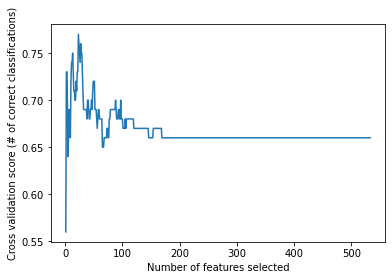

[[9.97893010e-01 2.10699018e-03]
 [9.13180118e-01 8.68198824e-02]
 [9.57351351e-01 4.26486491e-02]
 [9.86270036e-01 1.37299643e-02]
 [8.04509448e-01 1.95490552e-01]
 [8.71714592e-01 1.28285408e-01]
 [9.76544552e-01 2.34554483e-02]
 [9.84235498e-06 9.99990158e-01]
 [7.50353980e-07 9.99999250e-01]
 [5.24366158e-02 9.47563384e-01]
 [9.99637370e-01 3.62630143e-04]
 [4.37897310e-01 5.62102690e-01]
 [9.75730811e-01 2.42691890e-02]
 [7.69339220e-08 9.99999923e-01]
 [3.18028529e-09 9.99999997e-01]
 [9.99984740e-01 1.52604552e-05]
 [9.80187532e-01 1.98124680e-02]
 [8.21101791e-01 1.78898209e-01]
 [9.93728548e-01 6.27145157e-03]
 [6.05160041e-02 9.39483996e-01]
 [7.58858856e-07 9.99999241e-01]
 [8.55597328e-03 9.91444027e-01]
 [3.80569415e-01 6.19430585e-01]
 [6.33613820e-03 9.93663862e-01]
 [9.85000242e-02 9.01499976e-01]
 [3.15430102e-01 6.84569898e-01]
 [4.54639609e-01 5.45360391e-01]
 [1.44401257e-07 9.99999856e-01]
 [3.10601312e-03 9.96893987e-01]
 [4.13255989e-01 5.86744011e-01]
 [4.545906

,numFeatures,crossValidationScore
0,1,0.56
1,2,0.73
2,3,0.73
3,4,0.69
4,5,0.64
...,...,...
528,529,0.66
529,530,0.66
530,531,0.66
531,532,0.66


In [17]:
svc = SVC(kernel="linear", class_weight = 'balanced')
rfe = RFE(svc,  n_features_to_select = numGenesToFix) #numToSelect)
rfe = rfe.fit(x, y)


geneListSelected = miniDF
geneListSelected = geneListSelected[rfe.support_ == True]["geneName"].tolist()
geneListSelected

miniList = miniDF[miniDF["geneName"].isin(geneListSelected)]#["geneName"]
miniList = miniList.drop(["geneName"], axis = 1)
print(miniList)

# plotting
print(region.upper())
print("Optimal number of features : %d" % rfecv_red.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_red.grid_scores_) + min_features_to_select),
         rfecv_red.grid_scores_)
plt.show()


random_state = seedVal
modelSVC = SVC(kernel="linear", class_weight = 'balanced', random_state = seedVal, probability = True)

modelSVC.fit(miniList.transpose(), y)
modelSVC.predict_proba(miniList.transpose())
print(modelSVC.predict_proba(miniList.transpose()))

scores = cross_val_score(modelSVC, miniList.transpose(), y, cv=cvNum) #metrics.accuracy_score(y_Test, y_pred)
accuracyLOOCV = mean(scores)
sdLOOCV = std(scores)
cv = cvNum

print("accuracy ", cv, " CV:", accuracyLOOCV)
print("standard deviation ", cv, " CV:", sdLOOCV)

numToSelect = rfecv_red.n_features_
numToSelect
xAxisVals = range(min_features_to_select,
               len(rfecv_red.grid_scores_) + min_features_to_select)

yAxisVals = rfecv_red.grid_scores_
rfe_redCVDF = pd.DataFrame(xAxisVals, columns = ["numFeatures"])
rfe_redCVDF["crossValidationScore"] = yAxisVals
rfe_redCVDF

:) Please note rfe redCV is here:  F://rfe_redCVDF_Covid_SVC_LTL_4Fold.csv
:) geneListSelected:  ['CD180', 'CLEC10A', 'DGKD', 'DOK1', 'GAB3', 'LEF1', 'LYAR', 'MEF2A', 'MPO', 'PARVG', 'RNASET2', 'STAT4', 'TM9SF4', 'TTC39C', 'VPS45']
mean_tpr_ LTL : [0.0, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.6346153846153846, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615

C:\Users\saniy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


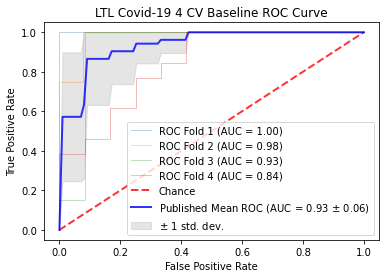

In [18]:
outputPart = outputPartPath + "rfe_redCVDF_Covid_SVC_" + addOnPart
print(":) Please note rfe redCV is here: ", outputPart)
rfe_redCVDF.to_csv(outputPart)

geneListSelected = miniDF
geneListSelected = geneListSelected[rfe.support_ == True]["geneName"].tolist()
print(":) geneListSelected: ", geneListSelected)



random_state = seedVal

X = miniList.transpose().values
X.shape
classifier = modelSVC
# #############################################################################

# Run classifier with cross-validation and plot ROC curves

splits = cvNum
kf = StratifiedKFold(n_splits=splits, random_state=random_state) #

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(kf.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC Fold {}'.format(i+1),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)

mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

print("mean_tpr_", region, ":", list(mean_tpr))
print("mean_fpr_", region, ":", list(mean_fpr))
print("mean_auc_", region, ":",  mean_auc)
print("std_auc_", region, ":",  std_auc)



ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Published Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
print(std_tpr)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

pltTitle = region + " Covid-19 " + str(splits) + " CV Baseline ROC Curve"
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title=pltTitle)
ax.legend(loc="lower right")
plt.show()

In [19]:
predictionsMade = [] # actual, class 0 pred, class 1 pred
probas1_ = modelSVC.predict_proba(miniList.transpose())
for i in range(0, len(y)):
    point = probas1_[i]
    yVal = y[i]
    predictionsMade.append([yVal, point[0], point[1], region])
predictionsMade

predDF = pd.DataFrame(predictionsMade, columns = ["actual", "covidNonICU(0)", "CovidICU(1)", "Region"])
predDF
outputPart = outputPartPath + "updatedPredDF_Covid_SVC_" + addOnPart
predDF.to_csv(outputPart)
print(":) Please note that this predicted probabilities result dataframe below is used to then perform Decision Curve Analysis to see the clinical benefits from using the Lateral Temporal Lobe AD-Covid Gene Regulatory Network:")
predDF

:) Please note that this predicted probabilities result dataframe below is used to then perform Decision Curve Analysis to see the clinical benefits from using the Lateral Temporal Lobe AD-Covid Gene Regulatory Network:


,actual,covidNonICU(0),CovidICU(1),Region
0,0,0.999857,0.000143,LTL
1,0,0.927069,0.072931,LTL
2,0,0.968481,0.031519,LTL
3,0,0.995135,0.004865,LTL
4,0,0.654364,0.345636,LTL
...,...,...,...,...
95,1,0.034093,0.965907,LTL
96,0,0.877489,0.122511,LTL
97,1,0.267950,0.732050,LTL
98,0,0.055951,0.944049,LTL


In [20]:
fpr = mean_fpr
tpr = mean_tpr
roc_auc = mean_auc

print(region," ", cvNum, " fold")
print("# genes: ", miniList.shape[0])
print("accuracy_", cvNum, "_fold_SVC", accuracyLOOCV)
print("sd_", cvNum, "_fold_SVC", sdLOOCV)
print("fpr")
print(list(fpr))#

print("tpr")
print(list(tpr))    
print("roc_auc")
print(roc_auc)

LTL   4  fold
# genes:  15
accuracy_ 4 _fold_SVC 0.9099999999999999
sd_ 4 _fold_SVC 0.09110433579144298
fpr
[0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.434343

## Area Under the Curve Comparison Between Lateral Temporal Lobe and Published Covid-19 Genes Model:

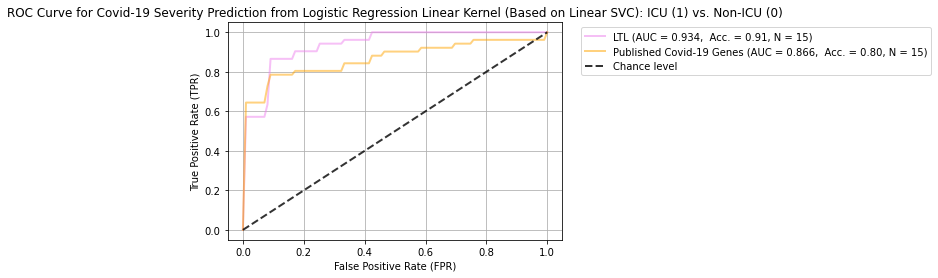

In [21]:
# #############################################################################
# Classification and ROC analysis
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

f = plt.figure()

# LTL:
fpr = [0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.43434343434343436, 0.4444444444444445, 0.4545454545454546, 0.4646464646464647, 0.4747474747474748, 0.48484848484848486, 0.494949494949495, 0.5050505050505051, 0.5151515151515152, 0.5252525252525253, 0.5353535353535354, 0.5454545454545455, 0.5555555555555556, 0.5656565656565657, 0.5757575757575758, 0.5858585858585859, 0.595959595959596, 0.6060606060606061, 0.6161616161616162, 0.6262626262626263, 0.6363636363636365, 0.6464646464646465, 0.6565656565656566, 0.6666666666666667, 0.6767676767676768, 0.686868686868687, 0.696969696969697, 0.7070707070707072, 0.7171717171717172, 0.7272727272727273, 0.7373737373737375, 0.7474747474747475, 0.7575757575757577, 0.7676767676767677, 0.7777777777777778, 0.787878787878788, 0.797979797979798, 0.8080808080808082, 0.8181818181818182, 0.8282828282828284, 0.8383838383838385, 0.8484848484848485, 0.8585858585858587, 0.8686868686868687, 0.8787878787878789, 0.888888888888889, 0.8989898989898991, 0.9090909090909092, 0.9191919191919192, 0.9292929292929294, 0.9393939393939394, 0.9494949494949496, 0.9595959595959597, 0.9696969696969697, 0.9797979797979799, 0.98989898989899, 1.0]
tpr = [0.0, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.5721153846153846, 0.6346153846153846, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.8653846153846154, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9038461538461539, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
roc_auc = 0.9341977466977467
plt.figure(1, figsize=(12,6))
plt.plot(fpr, tpr, lw=2, alpha=0.5, c = "violet", label='LTL (AUC = %0.3f,  Acc. = 0.91, N = 15)' % (roc_auc))

# Published Covid-19 Genes
fpr = [0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.43434343434343436, 0.4444444444444445, 0.4545454545454546, 0.4646464646464647, 0.4747474747474748, 0.48484848484848486, 0.494949494949495, 0.5050505050505051, 0.5151515151515152, 0.5252525252525253, 0.5353535353535354, 0.5454545454545455, 0.5555555555555556, 0.5656565656565657, 0.5757575757575758, 0.5858585858585859, 0.595959595959596, 0.6060606060606061, 0.6161616161616162, 0.6262626262626263, 0.6363636363636365, 0.6464646464646465, 0.6565656565656566, 0.6666666666666667, 0.6767676767676768, 0.686868686868687, 0.696969696969697, 0.7070707070707072, 0.7171717171717172, 0.7272727272727273, 0.7373737373737375, 0.7474747474747475, 0.7575757575757577, 0.7676767676767677, 0.7777777777777778, 0.787878787878788, 0.797979797979798, 0.8080808080808082, 0.8181818181818182, 0.8282828282828284, 0.8383838383838385, 0.8484848484848485, 0.8585858585858587, 0.8686868686868687, 0.8787878787878789, 0.888888888888889, 0.8989898989898991, 0.9090909090909092, 0.9191919191919192, 0.9292929292929294, 0.9393939393939394, 0.9494949494949496, 0.9595959595959597, 0.9696969696969697, 0.9797979797979799, 0.98989898989899, 1.0]
tpr = [0.0, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.7275641025641025, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.7852564102564102, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.8044871794871795, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.842948717948718, 0.8814102564102564, 0.8814102564102564, 0.8814102564102564, 0.8814102564102564, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9022435897435896, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9214743589743589, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9423076923076923, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 1.0]
roc_auc = 0.8656274281274282
plt.figure(1, figsize=(12,6))
plt.plot(fpr, tpr, lw=2, alpha=0.5, c = "orange", label='Published Covid-19 Genes (AUC = %0.3f,  Acc. = 0.80, N = 15)' % (roc_auc))


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Covid-19 Severity Prediction from Logistic Regression Linear Kernel (Based on Linear SVC): ICU (1) vs. Non-ICU (0)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.legend(loc="lower right")
plt.grid()
#plt.show()

plt.show()

#f.savefig("F://organizedAlzheimers//covidPaperADSNPhenoNEWER12345.pdf", bbox_inches='tight')
